# Pizza, Steak, and Sushi Classification

The Neural Architecture Search run for this project is available [here](https://www.kaggle.com/code/naresh/pizza-steak-sushi-nas?scriptVersionId=138761002). Some of the best performing runs are:

|Name|Accuracy|Batch Size|Embed Dims|Heads|Encoders|LR|Epochs|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|5_0|57.3|32|512|8|4|.000235|9|
|22_0|52|16|128|8|4|.000414|11|
|30_0|52|16|128|8|4|.000664|11|
|40_0|50.67|16|128|4|4|.000481|9|


Requirements for execution on cloud:
- Download [pizza_steak_sushi.py](https://raw.githubusercontent.com/NareshPS/doi-ml/main/torch/projects/pizza_steak_sushi/pizza_steak_sushi.py)
- [] Update *training_args_cmdline* at [Training](#3-training)

Ideas:
```
WEIGHT_DECAY = 0.3
optimizer = torch.optim.Adam(params=vit.parameters(), weight_decay=WEIGHT_DECAY)
```

# 1. Initialize the Environment

## 1.1. Install Modules and Download Scripts

In [ ]:
# # 1. Download pizza_steak_sushi.py script
# ! wget "https://raw.githubusercontent.com/NareshPS/doi-ml/main/torch/projects/pizza_steak_sushi/pizza_steak_sushi.py"

# # 2. Install Modules
# ! pip install torcheval torchmetrics torchinfo mlxtend

## 1.2. Configure toolbox

In [1]:
from pizza_steak_sushi import prepare_toolbox

prepare_toolbox()

[INFO] Toolbox exists locally. Skipping download!


## 1.3. Import Modules

In [20]:
import random
import torch
import torchvision
import torchinfo

from toolbox import data_download, data_setup, engine, utils, evaluation, visualization
from torchinfo import summary as model_summary
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn
from matplotlib import pyplot as plt
from timeit import default_timer as timer 
from pathlib import Path
from PIL import Image

SEED = 3

print(f'torch version: {torch.__version__}')
print(f'torchvision version: {torchvision.__version__}')
print(f'torchinfo version: {torchinfo.__version__}')
print(f'Seed Value: {SEED}')

torch version: 2.0.1
torchvision version: 0.15.2
torchinfo version: 1.8.0
Seed Value: 3


## 1.4. Create Log Directory

In [3]:
from pathlib import Path

log_path = Path('logs')
log_path.mkdir(parents=True, exist_ok=True)

print(f'Log Path: {log_path}')

Log Path: logs


# 2. Data Preparation

## 2.1. Procurement

In [4]:
from pizza_steak_sushi import download_data

train_path, val_path = download_data()

[INFO] /Users/broxoli/.datasets/pizza_steak_sushi directory exists. Skipping download.
Data Path: /Users/broxoli/.datasets/pizza_steak_sushi
Train Path: /Users/broxoli/.datasets/pizza_steak_sushi/train
Test Path: /Users/broxoli/.datasets/pizza_steak_sushi/test


## 2.2. Data Loaders

In [115]:
# from importlib import reload

# reload(data_setup)

# 1. Define Data Hyperparamters
IMG_SIZE = 224

# 2. Create a transform to apply over train and validation set.
transform = transforms.Compose(
    [transforms.Resize((IMG_SIZE, IMG_SIZE)), transforms.ToTensor()]
)

# 3. Create Dataloaders
train_dataloader, val_dataloader, class_names = data_setup.create_dataloaders(
    train_path, val_path, transform=transform, batch_size=2,
)


Train Set
------------
Dataset ImageFolder
    Number of datapoints: 225
    Root location: /Users/broxoli/.datasets/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
Classes: ['pizza', 'steak', 'sushi']
Class Dictionary: {'pizza': 0, 'steak': 1, 'sushi': 2}

Test Set
------------
Dataset ImageFolder
    Number of datapoints: 75
    Root location: /Users/broxoli/.datasets/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
Classes: ['pizza', 'steak', 'sushi']
Class Dictionary: {'pizza': 0, 'steak': 1, 'sushi': 2}


## 2.3. Data Exploration

Image Shape: torch.Size([3, 224, 224])
Label: 0


(-0.5, 223.5, 223.5, -0.5)

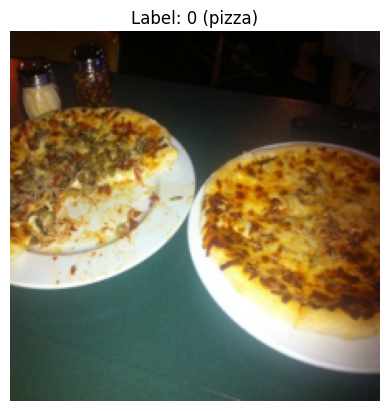

In [116]:
# 1. Get a single input
image, label = train_dataloader.dataset[0]

# 2. View input shapes
print(f'Image Shape: {image.shape}')
print(f'Label: {label}')

# 3. Visualize
image_permute = image.permute(1, 2, 0)
plt.imshow(image_permute)
plt.title(f'Label: {label} ({class_names[label]})')
plt.axis(False)

# 3. Training

In [12]:
training_args_cmdline = f'--log_path {str(log_path)} --batch_size 2 --embedding_dim 64 --num_heads 2 --num_encoders 2 --learning_rate 0.001 --epochs 2 --subset_size 10'
# training_args_cmdline = f'--log_path {str(log_path)} --batch_size 32 --embedding_dim 512 --num_heads 8 --num_encoders 4 --learning_rate 0.000235 --epochs 20'

! python pizza_steak_sushi.py {training_args_cmdline}

[INFO] Toolbox exists locally. Skipping download!
[INFO] /Users/broxoli/.datasets/pizza_steak_sushi directory exists. Skipping download.
Data Path: /Users/broxoli/.datasets/pizza_steak_sushi
Train Path: /Users/broxoli/.datasets/pizza_steak_sushi/train
Test Path: /Users/broxoli/.datasets/pizza_steak_sushi/test
[INFO] Logging to path: logs/1
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
[INFO] /Users/broxoli/.datasets/pizza_steak_sushi directory exists. Skipping download.
Data Path: /Users/broxoli/.datasets/pizza_steak_sushi
Train Path: /Users/broxoli/.datasets/pizza_steak_sushi/train
Test Path: /Users/broxoli/.datasets/pizza_steak_sushi/test
Missing logger folder: logs/1/lightning_logs

  | Name              | Type           | Params 
------------------------------------------------------
0 | embedding_dropout | Dropout        | 0      
1 | patch_embedding   | PatchEmbedding | 49.2 K

# 4. Trained Model

## 4.1. Find the Latest Checkpoint

In [84]:
from collections import namedtuple
from typing import List
from pathlib import Path

Checkpoint = namedtuple('Checkpoint', 'path epoch step')

def ckpt_epoch(ckpt_path: Path):
    return int(ckpt_path.stem.split("-")[0].split("=")[1])


def ckpt_step(ckpt_path: Path):
    return int(ckpt_path.stem.split("-")[1].split("=")[1])

def decode_ckpt_path(ckpt_path: Path):
    epoch = ckpt_epoch(ckpt_path=ckpt_path)
    step = ckpt_step(ckpt_path=ckpt_path)

    return Checkpoint(ckpt_path, epoch, step)

def get_most_recent_ckpt(ckpt_paths: List[Path]):
    ckpts = list(map(decode_ckpt_path, ckpt_paths))

    most_recent_epoch = max(ckpts, key=lambda x: x.epoch).epoch
    most_recent_epoch_ckpts = list(
        filter(lambda ckpt: ckpt.epoch == most_recent_epoch, ckpts)
    )

    return max(most_recent_epoch_ckpts, key= lambda x: x.step)

ckpt_paths = list(log_path.glob(pattern='**/*.ckpt'))
most_recent_ckpt = get_most_recent_ckpt(ckpt_paths)

print(f'Most Recent Checkpoint')
print("-----------------------")
print(f'most_recent_ckpt={most_recent_ckpt}')

Most Recent Checkpoint
-----------------------
most_recent_ckpt=Checkpoint(path=PosixPath('logs/0/lightning_logs/version_0/checkpoints/epoch=1-step=10.ckpt'), epoch=1, step=10)


## 4.2. Load the Latest Checkpoint

In [117]:
from pizza_steak_sushi import PizzaSteakSushiClassifier, create_args_parser
from argparse import ArgumentParser
from torchinfo import summary as model_summary

# 1. Create args parser
parser = create_args_parser()

# 2. Parse training commandline
args = parser.parse_args(
    training_args_cmdline.split(' ')
)

print('Training Script Arguments')
print('-------------------------')
print(f'args={args}')

# 3. Load the model from the checkpoint
model = PizzaSteakSushiClassifier.load_from_checkpoint(
    str(most_recent_ckpt.path),
    args=args,
    img_size=IMG_SIZE,
    embedding_dropout=0.1,
    attn_dropout=0.0,
    mlp_dropout=0.1,
)

print('\nModel Summary')
print('-------------')
print(model_summary(model))


Training Script Arguments
-------------------------
args=Namespace(log_path='logs', embedding_dim=64, num_heads=2, num_encoders=2, learning_rate=0.001, patch_size=16, batch_size=2, epochs=2, subset_size=10)

Model Summary
-------------
Layer (type:depth-idx)                                            Param #
PizzaSteakSushiClassifier                                         12,672
├─Dropout: 1-1                                                    --
├─PatchEmbedding: 1-2                                             --
│    └─Conv2d: 2-1                                                49,216
│    └─Flatten: 2-2                                               --
├─Sequential: 1-3                                                 --
│    └─TransformerEncoderBlock: 2-3                               --
│    │    └─MultiHeadSelfAttentionBlock: 3-1                      16,768
│    │    └─MLPBlock: 3-2                                         33,216
│    └─TransformerEncoderBlock: 2-4                  

# 5. Making Predictions

## 5.1. Pick Random Samples for Prediction

In [119]:
test_samples = []
test_labels = []
num_samples = 9

val_samples, val_labels = evaluation.pick_random_samples(
    dataset=val_dataloader.dataset, num_samples=num_samples, seed=SEED
)

print("Validation Sample")
print("------------")
print(
    f"Image Shape: {val_samples[0].shape} Label: {val_labels[0]} ({class_names[val_labels[0]]})"
)

Validation Sample
------------
Image Shape: torch.Size([3, 224, 224]) Label: 1 (steak)


## 5.2. Compute Class Probabilities

In [120]:
pred_probs = evaluation.make_predictions(model=model, data=val_samples, device=model.device)

print("Sample Probabilities")
print("--------------------")
print(f"pred_probs: {pred_probs}")

Sample Probabilities
--------------------
pred_probs: tensor([[0.9716, 0.0159, 0.0125],
        [0.9719, 0.0158, 0.0124],
        [0.9720, 0.0158, 0.0122],
        [0.9709, 0.0159, 0.0132],
        [0.9715, 0.0158, 0.0127],
        [0.9717, 0.0158, 0.0125],
        [0.9719, 0.0158, 0.0123],
        [0.9714, 0.0159, 0.0128],
        [0.9710, 0.0160, 0.0130]])


## 5.3. Predicted Classes

In [121]:
pred_classes = pred_probs.argmax(dim=1)

print('Predicted Classes')
print('-----------------')
print(f'pred_classes: {list(pred_classes.numpy())}')
print(f'test_labels : {val_labels}')

Predicted Classes
-----------------
pred_classes: [0, 0, 0, 0, 0, 0, 0, 0, 0]
test_labels : [1, 2, 0, 2, 2, 0, 0, 2, 1]


## 5.4. Visualize Results

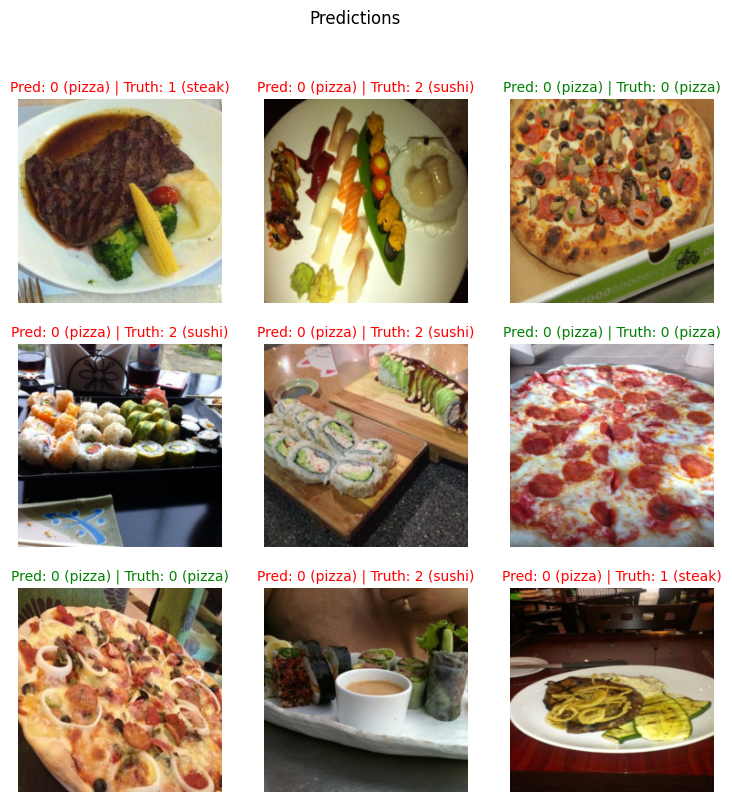

In [122]:
visualization.plot_image_classification(
    items=val_samples,
    targets=val_labels,
    predictions=pred_classes,
    class_names=class_names,
    item_size=3,
    rows=3,
)

# 6. Performance Evaluation

## 6.1. Compute Predictions for the Validation Set

In [107]:
# 1. Get the current device
device = utils.get_device()

# 2. Move the model to the device to compute predictions
model = model.to(device)

# 3. Create Dataloaders
_, val_dataloader, class_names = data_setup.create_dataloaders(
    train_path,
    val_path,
    transform=transform,
    batch_size=32,
)

# 4. Compute Predictions
y_pred_tensor = utils.timed_execution(
    evaluation.make_predictions_on_dataset,
    model=model,
    dataloader=val_dataloader,
    device=device,
)


Train Set
------------
Dataset ImageFolder
    Number of datapoints: 225
    Root location: /Users/broxoli/.datasets/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
Classes: ['pizza', 'steak', 'sushi']
Class Dictionary: {'pizza': 0, 'steak': 1, 'sushi': 2}

Test Set
------------
Dataset ImageFolder
    Number of datapoints: 75
    Root location: /Users/broxoli/.datasets/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
Classes: ['pizza', 'steak', 'sushi']
Class Dictionary: {'pizza': 0, 'steak': 1, 'sushi': 2}


Making predictions:   0%|          | 0/3 [00:00<?, ?it/s]

Total Execution Time: 20.371 seconds


## 6.2. Compute Confusion Matrix

Total Execution Time: 0.017 seconds


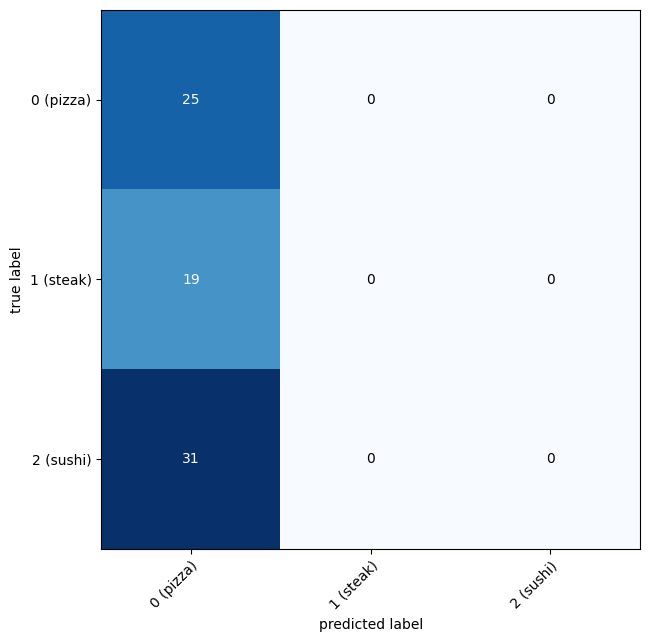

In [109]:
utils.timed_execution(
    visualization.plot_confusion_matrix,
    dataset=val_dataloader.dataset,
    class_names=val_dataloader.dataset.classes,
    preds=y_pred_tensor,
    figsize=(8, 6),
)